In [2]:
import pandas as pd
import ssl
import numpy as np
from pathlib import Path
import sqlalchemy
#import datetime

from utils.buildnn import buildnn

#import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential, Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

database_connection_string = 'sqlite:///SP500.db'
engine = sqlalchemy.create_engine(database_connection_string)

In [3]:
SectorDF = pd.read_sql_table('SectorDF3Y', engine)
SectorDF = SectorDF.drop(columns=['timestamp'])
SectorDF

,SPY Open,SPY Close,Industrials,Health Care,Information Technology,Communication Services,Consumer Staples,Consumer Discretionary,Utilities,Financials,Materials,Real Estate,Energy,SPY
0,413.93,412.17,-0.004149,-0.000356,-0.009452,-0.002727,-0.002429,-0.007847,-0.005995,-0.003404,-0.005562,0.002253,-0.001944,0.0
1,411.55,416.07,-0.008910,0.002328,-0.005653,-0.007387,0.009700,-0.015166,0.012631,-0.011951,-0.008709,0.011858,-0.025533,1.0
2,415.91,412.27,0.014615,0.010818,0.015466,0.016725,0.004558,0.019629,-0.006180,0.018827,0.019342,0.006578,0.034755,0.0
3,412.82,416.74,-0.006297,-0.001288,-0.006342,-0.004689,-0.006656,-0.003878,-0.007886,-0.008718,-0.015059,-0.005400,-0.012065,1.0
4,417.42,417.61,0.009747,0.007723,0.011177,0.003202,-0.002163,0.006801,-0.003110,0.020577,0.012318,0.003051,0.010520,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,444.11,439.92,-0.005791,0.005426,-0.007141,0.001863,0.001890,0.004482,0.001318,0.002899,0.002020,0.001696,0.027976,0.0
248,443.02,438.29,-0.001636,-0.016449,-0.008222,-0.001345,-0.002333,0.006947,-0.014041,-0.002284,-0.001462,-0.010802,-0.018648,0.0
249,437.96,443.31,-0.005875,-0.009887,-0.015830,-0.014729,0.000453,-0.009666,0.006666,-0.009787,-0.003684,0.001091,-0.003254,1.0
250,443.44,437.79,0.009596,0.009621,0.013019,0.016400,0.006615,0.019986,-0.002671,0.013958,0.011097,0.005808,0.002591,0.0


In [39]:
y = SectorDF["SPY"]
X = SectorDF.drop(columns=["SPY",'SPY Open','SPY Close'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

number_input_features = len(X.iloc[0])
number_output_neurons = 1
nn = Sequential()

actfunction = 'relu'

nn.add(Dense(units=16 , input_dim=number_input_features, activation=actfunction))

layers = [16,8]

for layer in layers:
    nn.add(Dense(units=layer, activation=actfunction))
nn.add(Dense(units=number_output_neurons, activation=actfunction))
nn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 16)                192       
                                                                 
 dense_40 (Dense)            (None, 16)                272       
                                                                 
 dense_41 (Dense)            (None, 8)                 136       
                                                                 
 dense_42 (Dense)            (None, 1)                 9         
                                                                 
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


C:\Users\canav\anaconda3\envs\dev\envs\dev\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\canav\anaconda3\envs\dev\envs\dev\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\canav\anaconda3\envs\dev\envs\dev\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  FutureWarning,


In [40]:
# y = SectorDF["SPY"]
# X = SectorDF.drop(columns=["SPY",'SPY Open','SPY Close'])
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# scaler = StandardScaler()
# X_scaler = scaler.fit(X_train)
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# number_input_features = len(X.iloc[0])
# number_input_features
# number_output_neurons = 1

In [41]:
# layers = [6,5,3]
# nn = Sequential()
# count = 0
# nn.add(Dense(units=(number_input_features + 1) // 2 , input_dim=number_input_features, activation="relu"))
# for layer in layers:
#     nn.add(Dense(units=layer, activation="relu"))
# nn.add(Dense(units=number_output_neurons, activation="sigmoid"))
# nn.summary()


In [42]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [43]:
# Fit the model using 500 epochs and the training data
fit_model = nn.fit(X_train_scaled, y_train, epochs=700)

Epoch 1/700
6/6 [==============================] - 0s 1ms/step - loss: 4.8984 - accuracy: 0.5105
Epoch 2/700
6/6 [==============================] - 0s 800us/step - loss: 4.2418 - accuracy: 0.5263
Epoch 3/700
6/6 [==============================] - 0s 1ms/step - loss: 3.6708 - accuracy: 0.5158
Epoch 4/700
6/6 [==============================] - 0s 804us/step - loss: 3.3208 - accuracy: 0.5368
Epoch 5/700
6/6 [==============================] - 0s 1ms/step - loss: 3.1631 - accuracy: 0.5421
Epoch 6/700
6/6 [==============================] - 0s 1ms/step - loss: 3.0878 - accuracy: 0.5421
Epoch 7/700
6/6 [==============================] - 0s 1ms/step - loss: 2.9960 - accuracy: 0.5579
Epoch 8/700
6/6 [==============================] - 0s 800us/step - loss: 2.8618 - accuracy: 0.5632
Epoch 9/700
6/6 [==============================] - 0s 1ms/step - loss: 2.7820 - accuracy: 0.5632
Epoch 10/700
6/6 [==============================] - 0s 800us/step - loss: 2.4947 - accuracy: 0.5632
Epoch 11/700
6/6 [===

In [44]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2/2 - 0s - loss: 4.7489 - accuracy: 0.4688 - 75ms/epoch - 38ms/step
Loss: 4.748878479003906, Accuracy: 0.46875


In [19]:
# Create a DataFrame using the model history and an index parameter
model_plot = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"]) + 1))

<AxesSubplot:>

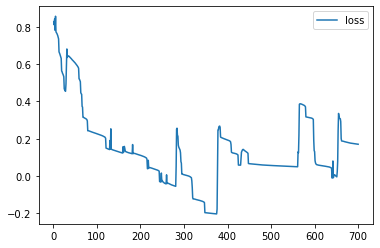

In [20]:
# Vizualize the model plot where the y-axis displays the loss metric
model_plot.plot(y="loss")

<AxesSubplot:>

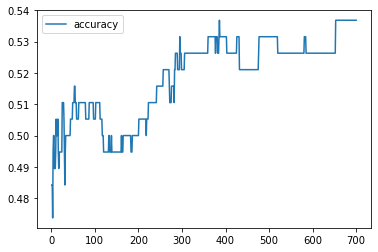

In [21]:
# Vizualize the model plot where the y-axis displays the accuracy metric
model_plot.plot(y="accuracy")

In [23]:
# Set the model's file path
file_path = Path("resources/nnmike.h5")

# Export your model to an HDF5 file
nn.save(file_path)